<a href="https://colab.research.google.com/github/charbull/svd/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This colab is an attempt to better understand how SVD works and how the ranks affect the matrix. To illustrate the rank, we will be using an image and we will show it with various ranks.

## Import

In [36]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import sys

## High level example

In [2]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

U, s, V = np.linalg.svd(A)

print(U)
print(s)
print(V)

[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
[1.68481034e+01 1.06836951e+00 4.41842475e-16]
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


## Play with an image

In [18]:
from google.colab import files

uploaded = files.upload()

Saving apple.png to apple (1).png


In [19]:
for filename in uploaded.keys():
  print('File uploaded:', filename)
  image_path = filename

File uploaded: apple (1).png


In [29]:
def print_img_with_rank(x: np.ndarray, r: int| None = None,
                        fig_num: int| None = None):
  if fig_num:
      plt.figure(fig_num)
  img = plt.imshow(x)
  img.set_cmap('gray')
  plt.axis('off')
  title = 'Shape: {}, size in bytes: {:,}'.format(str(x.shape), sys.getsizeof(x))
  if r:
    title = title + ', r = '+str(r)
  plt.title(title)
  plt.show()

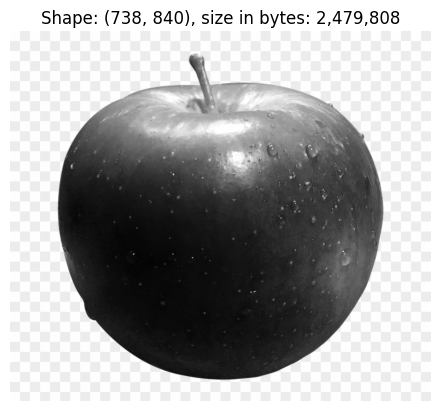

In [30]:
A = imread(image_path)
X = np.mean(A, -1) # conver RGB to Grayscale

print_img_with_rank(x=X)


In [22]:
U, S, VT = np.linalg.svd(X, full_matrices=False) #need only the economy version

In [23]:
S_d = np.diag(S)

## Lets try it on one rank

U shape:  (738, 738)
U_tilde shape:  (738, 20)
S shape:  (738, 738)
S_tilde shape:  (20, 20)
VT shape:  (738, 840)
VT_tilde shape:  (20, 840)
Resulting shape:  (738, 840)
size in bytes: {:,} 2479808


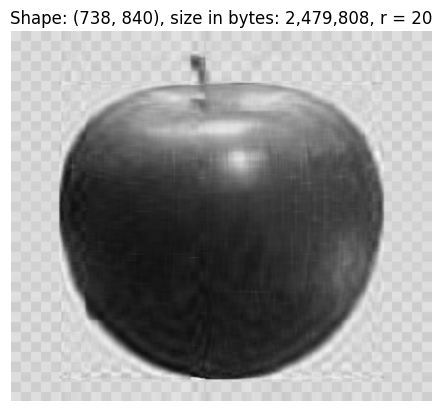

In [33]:
r = 20
U_tilde = U[:, :r]
print('U shape: ',U.shape)
print('U_tilde shape: ',U_tilde.shape)

S_tilde = S_d[0:r, :r]
print('S shape: ',S_d.shape)
print('S_tilde shape: ',S_tilde.shape)

VT_tilde = VT[:r,:]
print('VT shape: ',VT.shape)
print('VT_tilde shape: ',VT_tilde.shape)

Xapprox = U_tilde @ S_tilde @ VT_tilde
print('Resulting shape: ', Xapprox.shape)
s = sys.getsizeof(Xapprox)
print('size in bytes: {:,}', s)
print_img_with_rank(Xapprox, r, 1)

(738, 840)
2479808


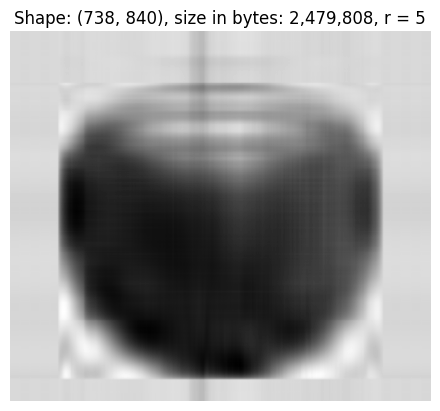

(738, 840)
2479808


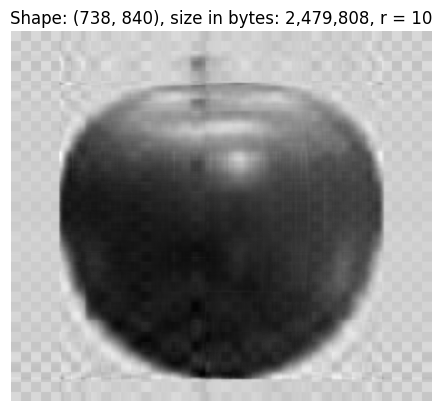

(738, 840)
2479808


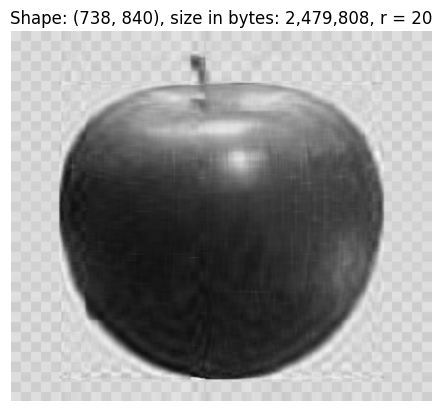

(738, 840)
2479808


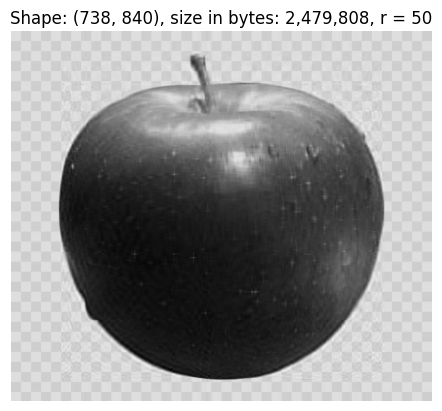

(738, 840)
2479808


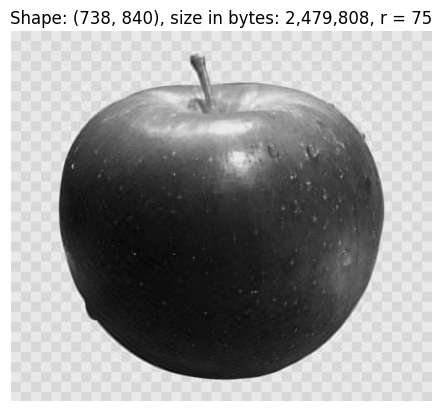

(738, 840)
2479808


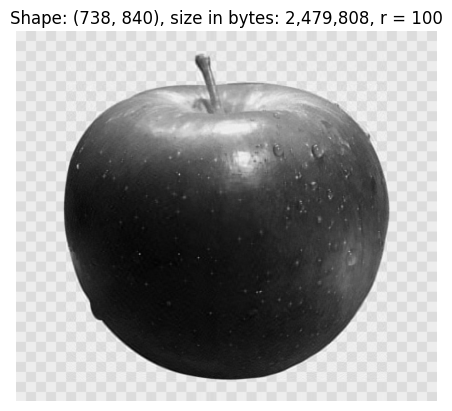

In [35]:
j = 0
for r in (5, 10, 20, 50, 75, 100):
  # construct image with ranks
  Xapprox = U[:, :r] @ S_d[0:r, :r] @ VT[:r,:]
  print(Xapprox.shape)
  s = sys.getsizeof(Xapprox)
  print(s)
  j +=1
  print_img_with_rank(Xapprox, r, j+1)
